### Portfolio of Oil Exploration Assets: Learning Options, Sequential Drilling Options and Defer Options 
####  Marco Antonio Guimarães Dias, 
#### Luigi de Magalhães Detomi Calvette
##### RO Congress - Boston 2017


[Paper](http://www.realoptions.org/openconf2017/data/papers/57.pdf)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import seaborn as sns
import timeit


In [2]:
#Importar Case 1
case_1=pd.read_csv("Case_1.csv", sep=';')
case_1.set_index('Type', inplace=True)
case_1=case_1.astype(float).T


In [3]:
case_1.head(6)

Type,Safe,Risky
CF,0.3,0.20
I_w,70.0,50.00
P,50.0,50.00
q,0.1,0.12
B,500.0,700.00
I_d,2300.0,4000.00


In [4]:
#Métrica de  VPL e VME

def NPV_EMV(CF, I_w, P_, q, B, I_d):
    V=q*B*P_;
    I_d= I_d*(P_/50) #com preço base
    NPV= V- I_d
    EMV= -I_w + CF*NPV
    
    return [NPV,EMV]



In [5]:
#VPL e Valor Esperado Médio do caso Seguro e do Arriscado
print(NPV_EMV(*case_1.Safe.values))
print(NPV_EMV(*case_1.Risky.values))

[200.0, -10.0]
[200.0, -10.0]


In [7]:
#fórmulas de VPL e VME com a opção de aprendizado

def EMV_portfolio(CF_1, I_w_1, P_1, q_1, B_1, I_d_1, CF_2, I_w_2, P_2, q_2, B_2, I_d_2,rho):
    
    #Métricas da primeiro prospecto
    V_1=q_1*B_1*P_1;
    I_d_1= I_d_1*(P_1/50) #com de 50 dolar o barril como preço base
    NPV_1= V_1- I_d_1
    EMV_1= -I_w_1 + CF_1*NPV_1
    
    
    #Ajuste do Fator de chance do segundo prospecto
    CF_s_2 = CF_2 + (np.sqrt((1-CF_1)/CF_1))*(np.sqrt(CF_2*(1-CF_2)))*rho
    CF_ins_2 = CF_2 - (np.sqrt(CF_1/(1-CF_1)))*(np.sqrt(CF_2*(1-CF_2)))*rho
    
    #Métricas para o segundo prospecto, considerando dois cenários do primeiro poço em Valor Esperado
    V_2=q_2*B_2*P_2;
    I_d_2= I_d_2*(P_2/50) #com preço base
    NPV_2= V_2- I_d_2
    
    EMV_s_2= -I_w_2 + CF_s_2*NPV_2
    EMV_ins_2= -I_w_2 + CF_ins_2*NPV_2
    
    #Análise de Portfolio, considerando a informação obtida no primeiro poço
        
    portfolio= EMV_1 + CF_1*max(EMV_s_2,0)+ (1-CF_1)*max(EMV_ins_2,0)
    
    return [portfolio]



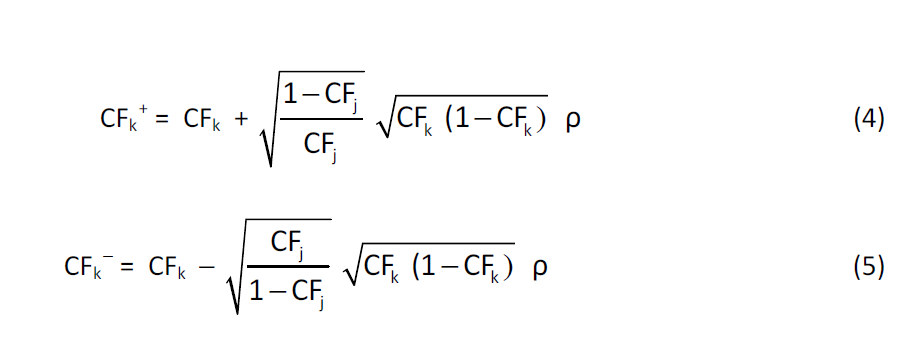

In [8]:
Image (filename="eq_4_5.PNG", width=500, height=500)

In [9]:
#Pensando em Portfolio, é melhor furar primeiro o seguro e depois o arriscado?
print (EMV_portfolio(*case_1.Safe, *case_1.Risky,0.75))
print (EMV_portfolio(*case_1.Risky, *case_1.Safe,0.75))

[14.495454169735044]
[15.495454169735041]


In [10]:
#Salvando listas com os atributos dos prospectos


Safe=[*case_1.Safe]
Risky=[*case_1.Risky]

In [11]:
#comparação de portfolio em função do preço P
#Listas de comparação
port_RS=[]
port_SR=[]
price=[] 
for p in np.arange(35,70.1,0.1):
    #salvando os preços
    price.append(p)
    #salvando sequência SR
    SR=EMV_portfolio(*Safe[0:2],p,*Safe[3:6],*Risky[0:2],p,*Risky[3:6],0.75)
    port_SR.append(SR)
    #salvando sequência RS
    
    RS=EMV_portfolio(*Risky[0:2],p,*Risky[3:6],*Safe[0:2],p,*Safe[3:6],0.75)
    port_RS.append(RS)
    

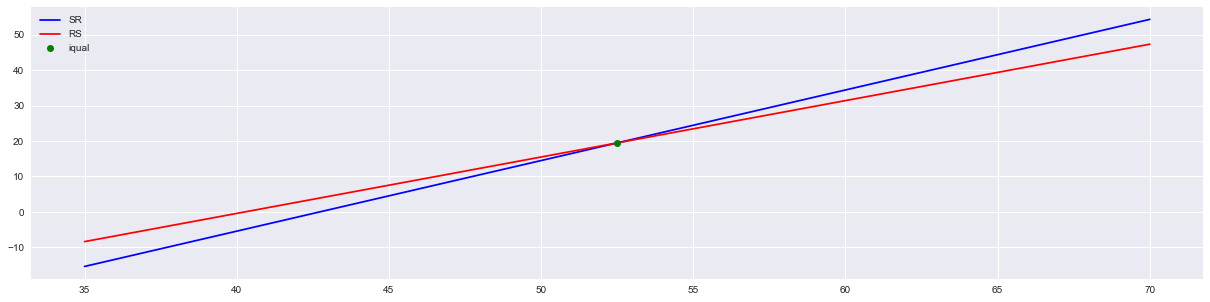

52.5
[19.47022687822216]
[19.470226878222245]


In [12]:
fig,ax=plt.subplots(1,1, figsize=(21,5))

ax.plot(price,port_SR, color='b',label='SR')
ax.plot(price,port_RS, color='r',label='RS')
ax.plot(price[175],port_RS[175],'go',label='iqual')
#plt.xlim(left=48,right=50)
#plt.ylim(bottom=-10,top=20)
plt.legend()
plt.show()
print(price[175])
print(port_RS[175])
print(port_SR[175])

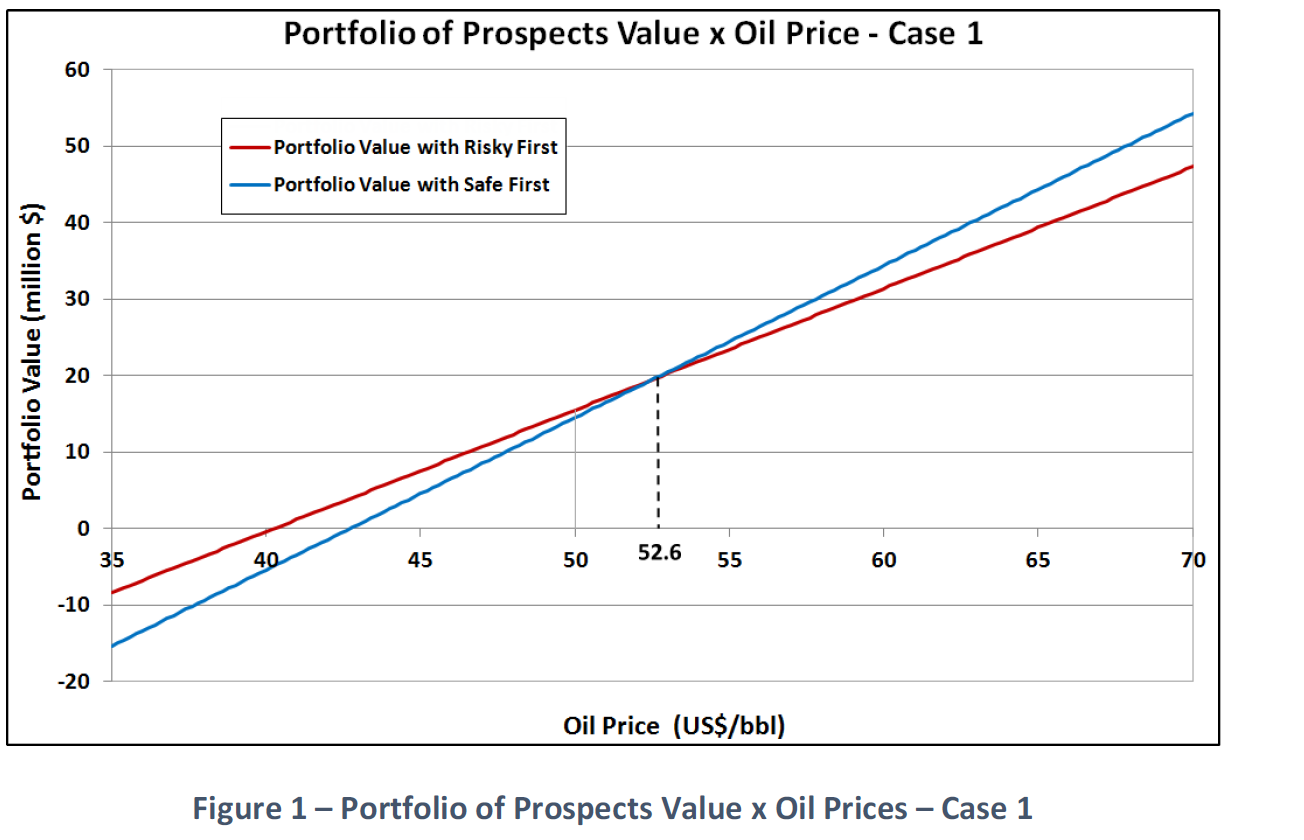

In [13]:
Image(filename='fig_1.PNG', width=500,height=500)

In [14]:
def concat_list(a,b,c):
    a=pd.DataFrame(a)
    b=pd.DataFrame(b)
    c=pd.DataFrame(c)
    df=pd.concat([a,b,c],axis=1)
    
    return df

In [15]:
data=concat_list(price,port_SR,port_RS)
data.columns=['price','port_SR','port_RS']
data.head()

,price,port_SR,port_RS
0,35.0,-15.353182,-8.353182
1,35.1,-15.154191,-8.194191
2,35.2,-14.955200,-8.035200
3,35.3,-14.756209,-7.876209
4,35.4,-14.557218,-7.717218


In [16]:
round(data[round(data.price,2) == round(52.5,2)],2)

,price,port_SR,port_RS
175,52.5,19.47,19.47


In [17]:
round(data[round(data.price,2) == round(50,2)],2)

,price,port_SR,port_RS
150,50.0,14.5,15.5


In [18]:
print(*NPV_EMV(*Safe[0:2],51,*Safe[3:6]))
print(*NPV_EMV(*Safe))

204.0 -8.8
200.0 -10.0


In [19]:
r=np.log(1+0.04)
print(r)
delta=np.log(1+0.05)
sigma=0.2
delta_t=1
T=1
Po=50

0.0392207131533


In [20]:
def EMV_portfolio_P(CF_1, I_w_1, q_1, B_1, I_d_1, CF_2, I_w_2, q_2, B_2, I_d_2,P,rho):
#Função criada igual a outra acima, contudo com um só preço. Será usada no cálculo da opção de espera    
    #Métricas da primeiro prospecto
    V_1=q_1*B_1*P;
    I_d_1= I_d_1*(P/50) #com preço base
    NPV_1= V_1- I_d_1
    EMV_1= -I_w_1 + CF_1*NPV_1
    
    
    #Ajuste do Fator de chance do segundo prospecto
    CF_s_2 = CF_2 + (np.sqrt((1-CF_1)/CF_1))*(np.sqrt(CF_2*(1-CF_2)))*rho
    CF_ins_2 = CF_2 - (np.sqrt(CF_1/(1-CF_1)))*(np.sqrt(CF_2*(1-CF_2)))*rho
    
    #Métricas para o segundo prospecto, considerando dois cenários do primeiro poço em Valor Esperado
    V_2=q_2*B_2*P;
    I_d_2= I_d_2*(P/50) #com preço base
    NPV_2= V_2- I_d_2
    
    EMV_s_2= -I_w_2 + CF_s_2*NPV_2
    EMV_ins_2= -I_w_2 + CF_ins_2*NPV_2
    
    #Análise de Portfolio, considerando a informação obtida no primeiro poço
        
    portfolio= EMV_1 + CF_1*max(EMV_s_2,0)+ (1-CF_1)*max(EMV_ins_2,0)
    
    return [max(0,portfolio)]  #qualquer portfolio não aceitará valor negativo de VME



In [21]:
# Defer Option
rho=0.75
#def defer_seq_learning_option(r,Po,delta,sigma,delta_t,T):
    # Método binomial Cox-Ross-Rubinstein - Baseado nos exercícios do Marco Antonio e Capítilo 9 do primeiro livro
    #Usando dois somente dois vetores para propagar, não uma matriz7
    
    #up, down e medida neutra ao risco
u=np.exp(sigma*np.sqrt(delta_t))
d=1/u
q= ((np.exp((r-delta)*delta_t) -d))/(u-d)

In [22]:
u

1.2214027581601699

In [23]:
P_m=[]
P_m_1=[]
P_m.append(Po)
for passo in np.arange(T*(1/delta_t)):
    for i in range(len(P_m)):
       
        Pu=P_m[i]*u
        Pd=P_m[i]*d
        P_m_1.append(Pu)
        P_m_1.append(Pd)
    P_m=[]
    P_m=P_m_1 #Registro Final está em P_m . 
    P_m_1=[]
    #print(P_m)

In [24]:
len(P_m)

2

In [25]:
safe=[*case_1.Safe]
risky=[*case_1.Risky]
del safe[2]
del risky[2]

In [26]:
#decisão e Melhor escolha no vencimento
port=[]
decision=[]
for i in range(len(P_m)):
    #lista com a melhor escolha entre SR,RS e abandono=0
    #lista com tamanho de P_m
    W=max(*EMV_portfolio_P(*safe, *risky,P_m[i],rho),*EMV_portfolio_P(*risky,*safe,P_m[i],rho),0)
    port.append(W)
    
    if W <= 0:
        decision.append('AB')
    elif W== EMV_portfolio_P(*safe, *risky,P_m[i],rho):
        decision.append('SR')
    else:
        decision.append('RS')
#    print(W)
#print(decision)
    

In [27]:
for passo in np.arange(T*(1/delta_t)):
    P_m_1=[]
    
    for i in range(int(len(P_m)/2)):
        P_m_1.append(P_m[i]/u)
     
    #tanto port_1 e decision_1 são informações que são apagadas a cada loop, sobrando somente a última, ou seja,
    #o valor da opção/portfolio hoje e da decisão
    port_1=[]
    decision_1=[]
    for i in range(len(P_m_1)):
             #lista com tamanho de P_m_1
            #lista com a melhor escolha entre SR,RS e abandono=0, no momento t-1, comparando com a opção de espera 
            W=[]
            W=max (
                *EMV_portfolio_P(*safe, *risky,P_m_1[i],rho),*EMV_portfolio_P(*risky,*safe,P_m_1[i],rho)
                               , np.exp(-r*delta_t)*(q*port[2*i]+(1-q)*port[2*i+1]), 0)
            port_1.append(W)
            #port_1 terá o valor da opção hoje
            #port tera o valor do portfolio no vencimento
            
            if W <= 0:
                decision_1.append('AB')
            elif W== EMV_portfolio_P(*safe, *risky,P_m_1[i],rho):
                decision_1.append('SR')
            elif W== EMV_portfolio_P(*risky, *safe,P_m_1[i],rho):
                decision_1.append('RS')
            else:
                decision_1.append('WS')
    
    decision=decision_1
    port=port_1
    P_m=P_m_1
    
    
print(decision_1)
print(port_1)    
#print(port)

['WS']
[15.577374752022045]


In [32]:
rho=0.75

In [33]:
def defer_seq(case,r,delta,sigma,delta_t,T,Po,rho):
    # Defer Option
    #def defer_seq_learning_option(r,Po,delta,sigma,delta_t,T):
    # Método binomial Cox-Ross-Rubinstein - Baseado nos exercícios do Marco Antonio e Capítilo 9 do primeiro livro
    #Usando dois somente dois vetores para propagar, não uma matriz7
    
    #up, down e medida neutra ao risco
    u=np.exp(sigma*np.sqrt(delta_t))
    d=1/u
    q= ((np.exp((r-delta)*delta_t) -d))/(u-d)

    P_m=[]
    P_m_1=[]
    P_m.append(Po)
    for passo in np.arange(T*(1/delta_t)):
        for i in range(len(P_m)):
       
            Pu=P_m[i]*u
            Pd=P_m[i]*d
            P_m_1.append(Pu)
            P_m_1.append(Pd)
        P_m=[]
        P_m=P_m_1 #Registro Final está em P_m . 
        P_m_1=[]
        #print(P_m)
    
    safe=[*case.Safe]
    risky=[*case.Risky]
    del safe[2]
    del risky[2]



    #decisão e Melhor escolha no vencimento
    port=[]
    decision=[]
    for i in range(len(P_m)):
        #lista com a melhor escolha entre SR,RS e abandono=0
        #lista com tamanho de P_m
        W=max(*EMV_portfolio_P(*safe, *risky,P_m[i],rho),*EMV_portfolio_P(*risky,*safe,P_m[i],rho),0)
        port.append(W)
    
        if W <= 0:
            decision.append('AB')
        elif W== EMV_portfolio_P(*safe, *risky,P_m[i],rho):
            decision.append('SR')
        else:
            decision.append('RS')
    #    print(W)
    #print(decision)


    for passo in np.arange(T*(1/delta_t)):
        P_m_1=[]
    
        for i in range(int(len(P_m)/2)):
            P_m_1.append(P_m[i]/u)
     
        #tanto port_1 e decision_1 são informações que são apagadas a cada loop, sobrando somente a última, ou seja,
        #o valor da opção/portfolio hoje e da decisão
        port_1=[]
        decision_1=[]
        for i in range(len(P_m_1)):
                 #lista com tamanho de P_m_1
                #lista com a melhor escolha entre SR,RS e abandono=0, no momento t-1, comparando com a opção de espera 
                W=[]
                W=max (*EMV_portfolio_P(*safe, *risky,P_m_1[i],rho),*EMV_portfolio_P(*risky,*safe,P_m_1[i],rho), 
                       np.exp(-r*delta_t)*(q*port[2*i]+(1-q)*port[2*i+1]), 0)
                port_1.append(W)
                #port_1 terá o valor da opção hoje
                #port tera o valor do portfolio no vencimento
            
                if W <= 0:
                    decision_1.append('AB')
                elif W== EMV_portfolio_P(*safe, *risky,P_m_1[i],rho):
                    decision_1.append('SR')
                elif W== EMV_portfolio_P(*risky, *safe,P_m_1[i],rho):
                    decision_1.append('RS')
                else:
                    decision_1.append('WS')
    
        decision=decision_1
        port=port_1
        P_m=P_m_1
    #print('Decision, wait, SR and RS')
    return[*decision_1,
           *port_1,
           #np.exp(-r*delta_t)*(q*port[2*i]+(1-q)*port[2*i+1]),
           *EMV_portfolio_P(*safe, *risky,P_m_1[i],rho),
           *EMV_portfolio_P(*risky,*safe,P_m_1[i],rho)]
    

In [108]:
r=np.log(1+0.04)
#print(r)
delta=np.log(1+0.05)
sigma=0.2
delta_t=1/3
T=3
Po=50
rho=0.65

In [109]:
#Importar Case 2
case_2=pd.read_csv("Case_2.csv", sep=';')
case_2.set_index('Type', inplace=True)
case_2=case_2.astype(float).T
case_2.head(6)


Type,Safe,Risky
CF,0.5,0.30
I_w,70.0,45.00
P,50.0,50.00
q,0.1,0.12
B,600.0,500.00
I_d,2900.0,2800.00


In [110]:
defer_seq(case_2,r,delta,sigma,delta_t,T,Po,rho)

['WS', 24.431722346333217, 17.286742017212958, 23.893371008606483]

In [55]:
 #print(timeit.timeit("defer_seq(case_2,r,delta,sigma,delta_t,T,Po,rho)"))

In [196]:
Price=[]
Time=[]
Dec=[]
for T in np.arange(0.01,3.1,0.25):
    Check=defer_seq(case_2,r,delta,sigma,delta_t,(3.1- T),30,rho)[0]
    for Po in np.arange(30,75.1,0.1):
        if defer_seq(case_2,r,delta,sigma,delta_t,(3.1- T),Po,rho)[0] != Check:
            Price.append(Po)
            Time.append(T)
            Check=defer_seq(case_2,r,delta,sigma,delta_t,(3.1-T),Po,rho)[0]
            Dec.append(Check)
            
df=pd.DataFrame(Price)
df.columns=['Price']
df['Time']=Time
df['Decision']=Dec

In [197]:
df.shape

(40, 3)

In [198]:
WS=df[df.Decision == 'WS']
RS=df[df.Decision == 'RS']
SR=df[df.Decision == 'SR']

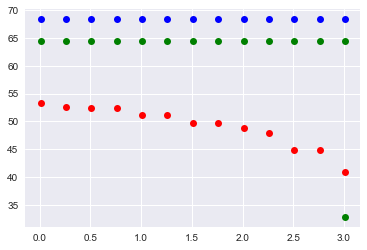

In [199]:
plt.plot(SR.Time, SR.Price, 'bo', color='b' )
plt.plot(RS.Time, RS.Price, 'bo', color='r')
plt.plot(WS.Time, WS.Price, 'bo', color='g')


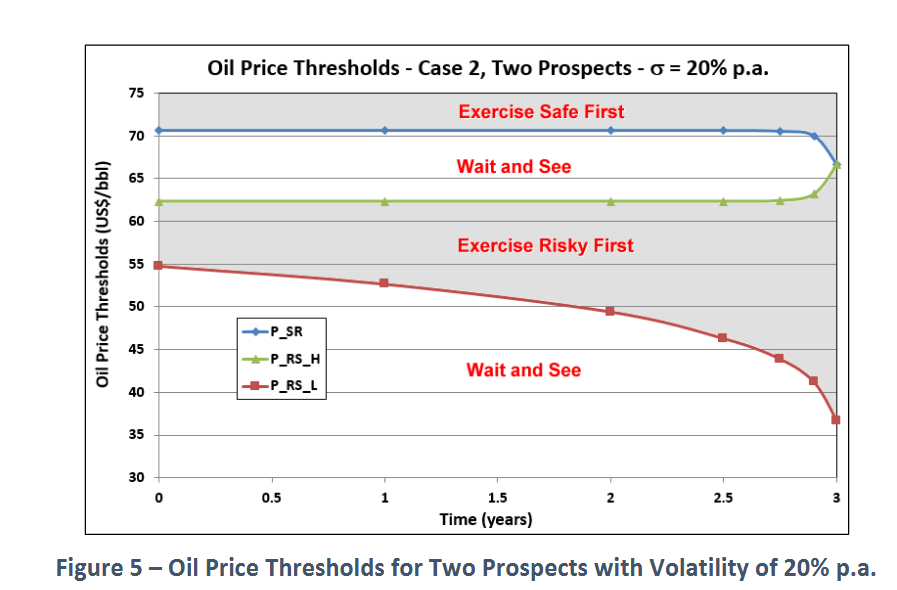

In [204]:
Image(filename='fig_5.PNG', width=500,height=500)

In [183]:
Price=[]
Time=[]
Dec=[]
for T in np.arange(0.01,3.1,0.125):
    Check=defer_seq(case_2,r,delta,0.3,delta_t,(3.1- T),30,rho)[0]
    for Po in np.arange(30,75.1,0.1):
        if defer_seq(case_2,r,delta,0.3,delta_t,(3.1- T),Po,rho)[0] != Check:
            Price.append(Po)
            Time.append(T)
            Check=defer_seq(case_2,r,delta,0.3,delta_t,(3.1-T),Po,rho)[0]
            Dec.append(Check)
            
df2=pd.DataFrame(Price)
df2.columns=['Price']
df2['Time']=Time
df2['Decision']=Dec

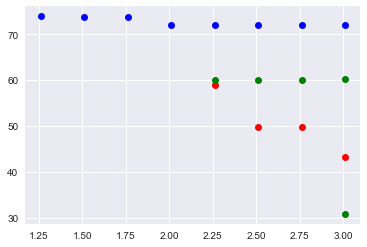

In [187]:
WS2=df2[df2.Decision == 'WS']
RS2=df2[df2.Decision == 'RS']
SR2=df2[df2.Decision == 'SR']

plt.plot(SR2.Time, SR2.Price, 'bo', color='b' )
plt.plot(RS2.Time, RS2.Price, 'bo', color='r')
plt.plot(WS2.Time, WS2.Price, 'bo', color='g')


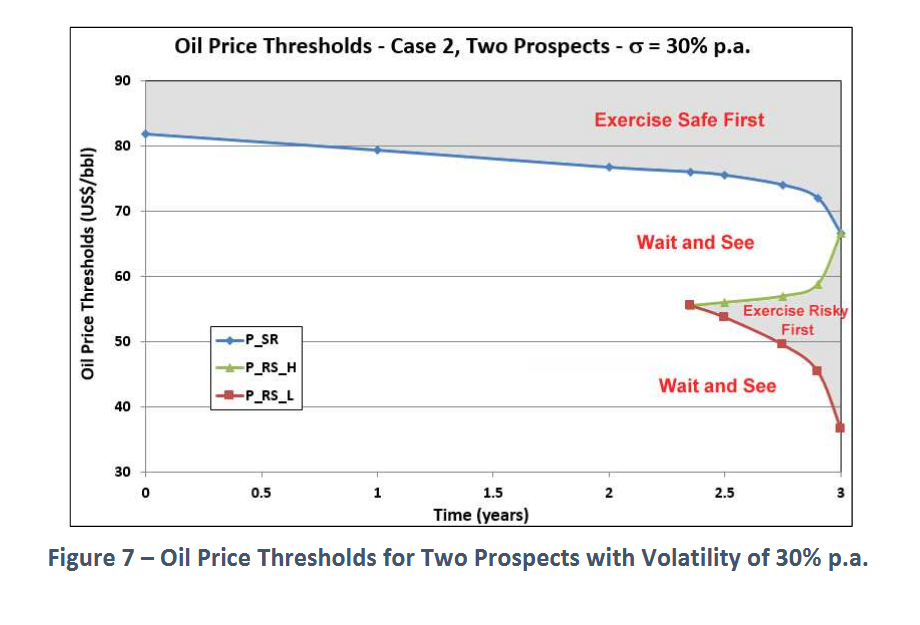

In [205]:
Image(filename='fig_7.PNG', width=500,height=500)

In [201]:
df.to_csv("gatilho_020.csv")
df2.to_csv("gatilho_030.csv")